## Quick and dirty compare

Sometimes all your need is a simple comparison of two time series. The `modelskill.compare()` method does just that.

In [1]:
import mikeio 
import modelskill as ms

### The model
Can be either a dfs0 or a DataFrame. 

In [2]:
fn_mod = '../tests/testdata/SW/ts_storm_4.dfs0'
df_mod = mikeio.read(fn_mod, items=0).to_dataframe()  # select 1 item

### The observation
Can be either a dfs0, a DataFrame or a PointObservation object. 

In [3]:
fn_obs = '../tests/testdata/SW/eur_Hm0.dfs0'

### compare()

The compare() method will return an object that can be used for scatter plots, skill assessment, time series plots etc.

If the observation or model has more than 1 item, the `obs_item` or `mod_item` can be given to specify the relevant item. 

In [4]:
c = ms.compare(fn_obs, df_mod)   # both with 1 item only
#c = ms.compare(fn_obs, fn_mod, mod_item=0) # need to specify item in model file

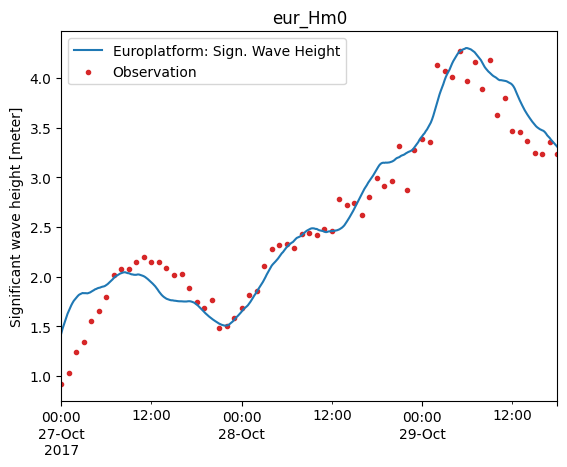

In [5]:
c.plot.timeseries();

In [6]:
c.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
eur_Hm0,67,0.052239,0.22824,0.222181,0.174851,0.968321,0.085898,0.929767


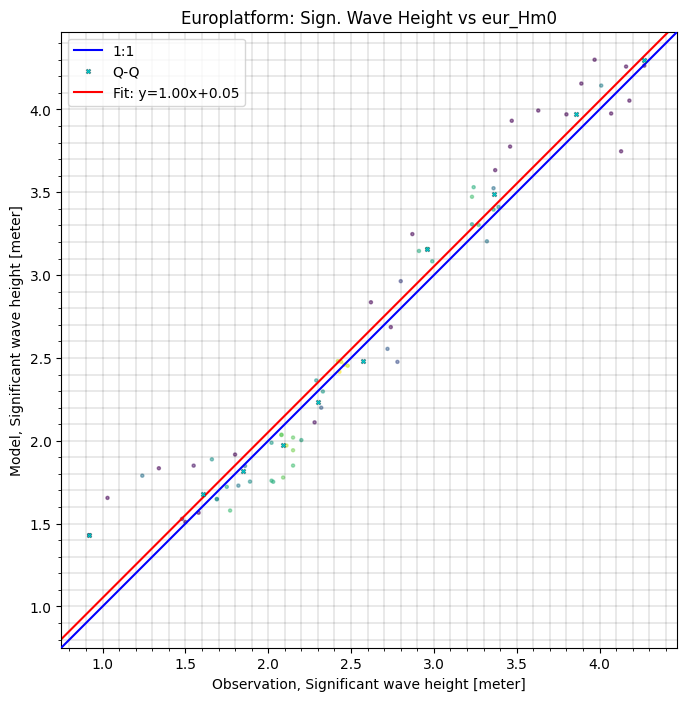

In [7]:
c.plot.scatter();

By default the regression line is fitted based on all the data.
In order to fit do a weighted regression based on the quantiles, use the `fit_to_quantiles` option.

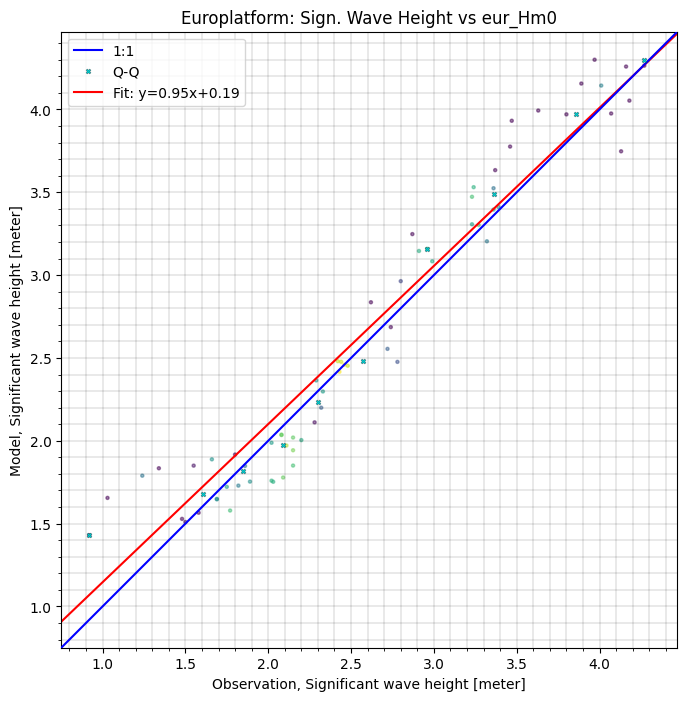

In [8]:
c.plot.scatter(fit_to_quantiles=True);

An example including the background data and skill table using the `show_points` use the `skill_table` options:

In [9]:
ms.settings.load_style(name='MOOD')

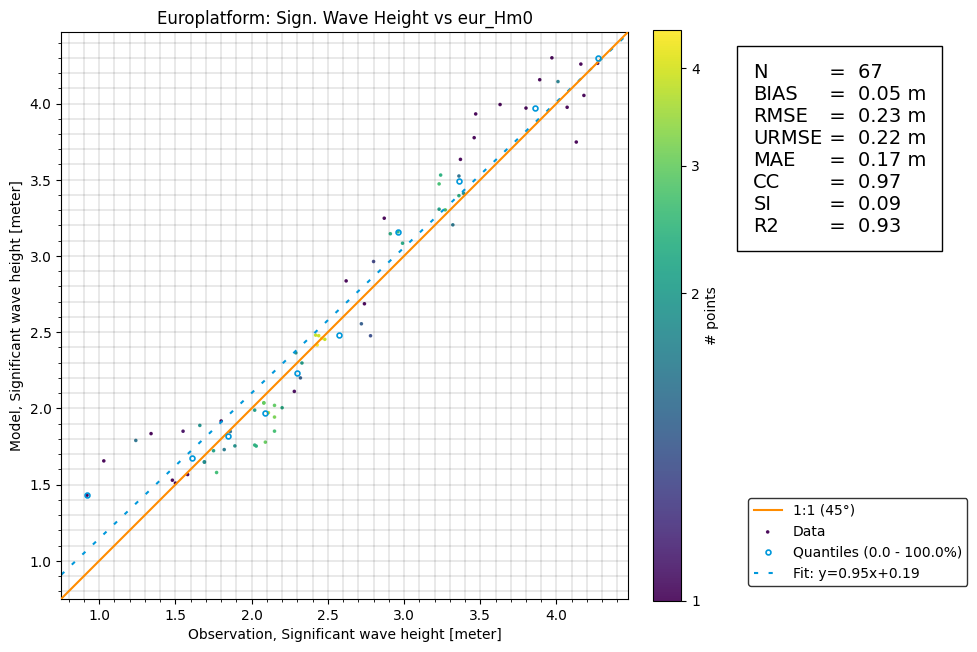

In [10]:
c.plot.scatter(fit_to_quantiles=True, show_points=True, skill_table=True);

/home/jan/src/modelskill/modelskill/comparison/_comparison.py:1175: FutureWarning: taylor is deprecated, use plot.taylor instead
  warnings.warn("taylor is deprecated, use plot.taylor instead", FutureWarning)


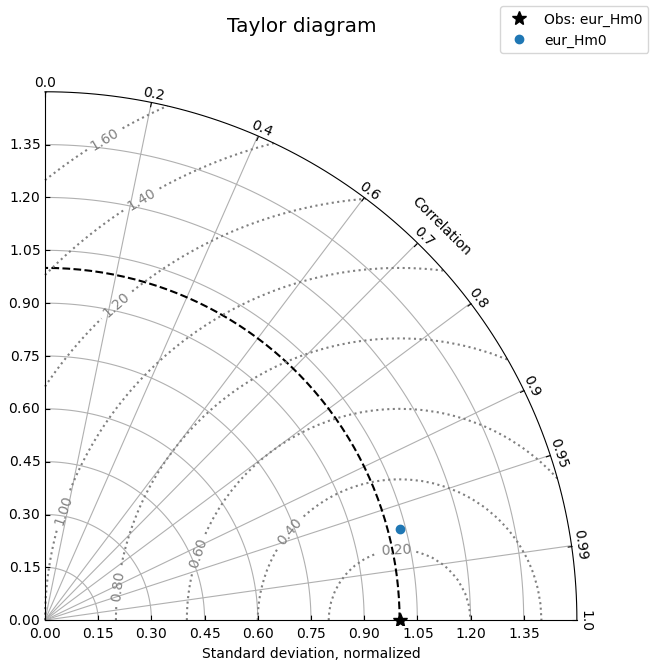

In [11]:
c.taylor(normalize_std=True)